In [1]:
import numpy as np
import sympy as sp 
import scipy as sc

import networkx as nx
import minorminer as mm 
import dwave_networkx as dnx

import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

from sympy.physics.quantum import TensorProduct

from Utilities import PyQUBO_Helpers
from Utilities import Channel_Rayleigh, Gauss_noise, Dict_to_Mat

from Call_Problem import Problemv2


In [2]:
def chain(embedding):
    chains = list(embedding[0].values())

    chain_lengths = []
    for chain in chains:
        chain_lengths.append(len(chain))
    return chains, chain_lengths


In [3]:
import itertools

def nq_embedding(chains):
    return len(list(itertools.chain(*chains)))

In [4]:
import random

def create_s(length):
    real = np.array([random.randrange(-3,4,2) for p in range(0,length)])
    im = np.array([random.randrange(-3,4,2) for p in range(0,length)])

    return real + im*1J
create_s(4)

array([-1.+3.j, -3.-3.j, -3.-3.j,  3.+3.j])

In [112]:
problem_size = [2, 2]
s = create_s(problem_size[0])
nq = 6
params = [5,5,5]
nq_pre = []
nq_compiled = []
nq_post_emb = []
longest_chain = []

trial = Problemv2(problem_size, [-4,4], nq, s)

fulltest = trial.Get_Problem('FULL', params)


Array([((((((Binary('q[0]') * 0.125000) + (Binary('q[1]') * 0.250000)) + (Binary('q[2]') * 0.500000)) + Binary('q[3]')) + (Binary('q[4]') * 2.000000)) + (Binary('q[5]') * -4.000000)), ((((((Binary('q[6]') * 0.125000) + (Binary('q[7]') * 0.250000)) + (Binary('q[8]') * 0.500000)) + Binary('q[9]')) + (Binary('q[10]') * 2.000000)) + (Binary('q[11]') * -4.000000)), ((((((Binary('q[12]') * 0.125000) + (Binary('q[13]') * 0.250000)) + (Binary('q[14]') * 0.500000)) + Binary('q[15]')) + (Binary('q[16]') * 2.000000)) + (Binary('q[17]') * -4.000000)), ((((((Binary('q[18]') * 0.125000) + (Binary('q[19]') * 0.250000)) + (Binary('q[20]') * 0.500000)) + Binary('q[21]')) + (Binary('q[22]') * 2.000000)) + (Binary('q[23]') * -4.000000))])


In [113]:
fulltest_model = fulltest.compile()

fulltest_model_qubo = fulltest_model.to_qubo(index_label=True)

qubomat = Dict_to_Mat(fulltest_model_qubo[0])

graph = nx.from_numpy_array(qubomat)


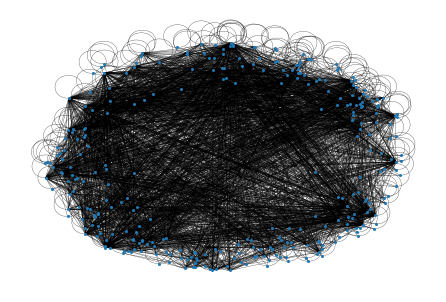

In [114]:
nx.draw(graph, node_size=4, width=0.25)
plt.show()

In [115]:

P16 = dnx.pegasus_graph(16)

embedding = mm.find_embedding(graph, P16, return_overlap=True, verbose=1)

chains, chain_lens = chain(embedding)

# print(embedding, '\n')
print(chain_lens)

[12, 12, 14, 11, 12, 12, 17, 19, 17, 21, 23, 18, 17, 17, 17, 20, 19, 22, 20, 21, 16, 18, 21, 14, 16, 19, 18, 16, 22, 18, 13, 13, 11, 11, 18, 10, 13, 7, 8, 11, 10, 7, 15, 7, 6, 7, 9, 8, 9, 7, 11, 8, 9, 6, 9, 7, 6, 6, 8, 5, 9, 7, 7, 6, 6, 4, 6, 4, 5, 5, 5, 12, 4, 4, 5, 3, 3, 5, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 5, 6, 9, 5, 6, 4, 5, 7, 12, 10, 9, 9, 3, 3, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 2, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 3, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 2, 4, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 5, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 4, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 7, 6, 2, 2, 3, 3, 1, 1, 2, 4, 1, 1, 1, 2, 3, 4, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1]


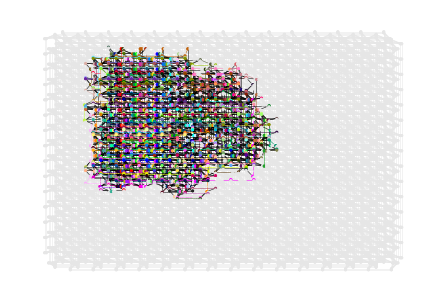

In [116]:
dnx.draw_pegasus_embedding(P16, embedding[0], node_size=4, width=0.5)
plt.show()

In [117]:
from dwave.system import DWaveSampler, FixedEmbeddingComposite
import dimod
from dwave.system import EmbeddingComposite

qpu_advantage = DWaveSampler(solver={'topology__type': 'pegasus'})

# bqm = dimod.BinaryQuadraticModel.from_qubo(embedding[0])
# bqm

In [118]:


result_papr = FixedEmbeddingComposite(qpu_advantage, embedding[0]).sample_qubo(fulltest_model_qubo,
               num_reads=100,
               auto_scale=True,
               return_embedding=True, 
#                chain_strength=chain_strengths[qpu],
               answer_mode='raw',
               label='PAPR 2x2 4')
result_papr

DisconnectedChainError: chain for 14 is not connected

In [ ]:
### find out why some are not connected.. it could be that they are dead (mm doesn't know)
### so need to remove dead qubits from grahp before finding embedding.

In [119]:
sampler = EmbeddingComposite(qpu_advantage)

result_papr = sampler.sample_qubo(fulltest_model_qubo[0],
                                  num_reads=100,
                                  auto_scale=True,
                                  return_embedding=True,
                                  annealing_time = 20,
                                  answer_mode='raw',
                                  label='PAPR 2x2 6'
                                 )
result_papr

SampleSet(rec.array([([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0], -17249.43343986, 1, 0.08974359),
       

In [120]:
min_energies = result_papr.record['energy']
min_energies = min_energies[:5]
min_energies

array([-17249.43343986, -22095.58922374, -19612.59231593, -21136.02915866,
       -20021.7870796 ])

In [121]:
min_configs = result_papr.record['sample'][:5]
# min_configs

In [89]:
precoded_vec = trial.xtilde
precoded_vec.bit_list[0].

((((Binary('q[0]') * 0.500000) + Binary('q[1]')) + (Binary('q[2]') * 2.000000)) + (Binary('q[3]') * -4.000000))

In [122]:
decoded = fulltest_model.decode_sampleset(result_papr)
best_sample = min(decoded, key=lambda s: s.energy)

best_sample.sample

{'q[15] * q[20]': 0,
 'q[15] * q[21]': 0,
 'q[2]': 0,
 'q[4] * q[18]': 0,
 'q[2] * q[23]': 0,
 'q[11] * q[22]': 1,
 'q[1] * q[11]': 0,
 'q[5] * q[13]': 0,
 'q[14] * q[19]': 0,
 'q[13] * q[19]': 0,
 'q[13] * q[15]': 1,
 'q[10] * q[11]': 0,
 'q[2] * q[18]': 1,
 'q[9] * q[10]': 1,
 'q[2] * q[17]': 0,
 'q[0] * q[9]': 1,
 'q[14] * q[23]': 0,
 'q[0] * q[15]': 0,
 'q[6] * q[22]': 1,
 'q[1] * q[18]': 1,
 'q[0] * q[19]': 0,
 'q[14] * q[17]': 0,
 'q[14] * q[16]': 1,
 'q[1] * q[21]': 0,
 'q[5] * q[9]': 1,
 'q[16] * q[23]': 0,
 'q[3] * q[13]': 1,
 'q[10] * q[23]': 1,
 'q[9] * q[14]': 0,
 'q[13] * q[22]': 0,
 'q[2] * q[20]': 1,
 'q[13] * q[21]': 0,
 'q[11] * q[17]': 1,
 'muq[3]': 1,
 'q[8] * q[21]': 1,
 'q[1] * q[10]': 0,
 'q[1] * q[2]': 1,
 'q[0] * q[1]': 0,
 'q[8] * q[17]': 1,
 'q[9] * q[12]': 1,
 'q[14] * q[15]': 1,
 'q[13] * q[18]': 1,
 'q[10] * q[22]': 0,
 'q[12] * q[21]': 1,
 'q[1] * q[5]': 1,
 'q[4] * q[16]': 0,
 'q[9] * q[11]': 0,
 'q[12] * q[20]': 1,
 'q[14] * q[21]': 0,
 'q[17] * q[23]': 

In [129]:
variables = fulltest_model.variables
variables = variables[6:30]
variables


['q[0]',
 'q[1]',
 'q[2]',
 'q[3]',
 'q[4]',
 'q[5]',
 'q[6]',
 'q[7]',
 'q[8]',
 'q[9]',
 'q[10]',
 'q[11]',
 'q[12]',
 'q[13]',
 'q[14]',
 'q[15]',
 'q[16]',
 'q[17]',
 'q[18]',
 'q[19]',
 'q[20]',
 'q[21]',
 'q[22]',
 'q[23]']

In [130]:
xtilde_qs = [best_sample.sample[var] for var in variables]

print(xtilde_qs)
print(PyQUBO_Helpers(4,4).Bin_Approx([-4,4], nq))

xtilde = np.zeros(problem_size[1]*2, dtype='float')


for i in range(len(xtilde)):
#     xtilde[i] = xtilde_qs
#     print(xtilde_qs[i*nq : nq*(i+1)])
#     print(PyQUBO_Helpers(4,6).Bin_Approx([-4,4], nq))
    xtilde[i] = np.dot(xtilde_qs[i*nq : nq*(i+1)], PyQUBO_Helpers(4,6).Bin_Approx([-4,4], nq))

xtilde = np.array(xtilde)
xtilde

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1]
[ 0.125  0.25   0.5    1.     2.    -4.   ]


array([ 0.   , -1.625, -1.   , -3.375])

In [133]:
def xtilde_to_x(xtilde):
    re = xtilde[:int(len(xtilde)/2)]
    im = xtilde[int(len(xtilde)/2) :]
    return re + im*1J

In [135]:
precoded_vec = xtilde_to_x(xtilde)
precoded_vec

array([ 0.   -1.j   , -1.625-3.375j])

In [143]:
## Hx + n != s 
print(s)
Channel_Rayleigh(problem_size[0], problem_size[1])@precoded_vec + Gauss_noise(2)

[ 3.+1.j -1.+1.j]


array([5.43077987-8.95589738j, 3.94519524-6.44148572j])

A.) Script sub-back + test (better)

B.) Compare with existing/classical

C.) Fix embedding to take into account dead qubits